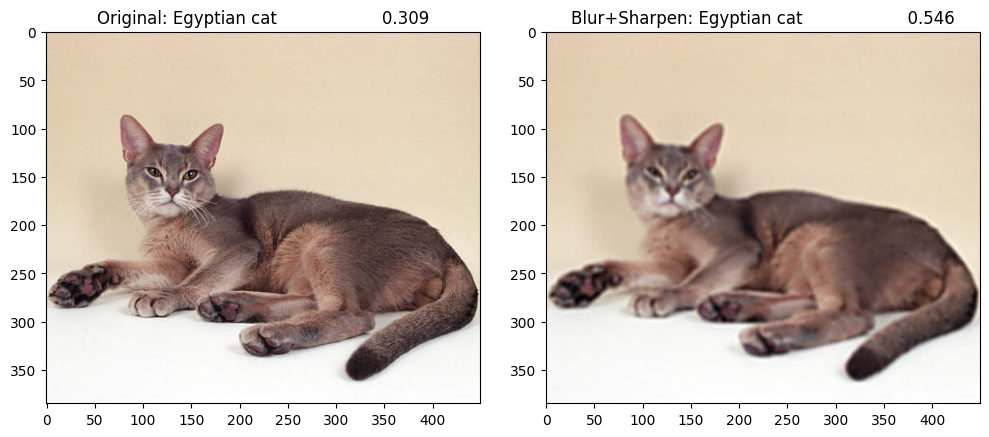

In [53]:
import torch, torchvision
import numpy as np
import matplotlib.pyplot as plot
from torchvision import transforms
from torchvision.models import resnet50, ResNet50_Weights
from PIL import Image, ImageEnhance, ImageFilter
from captum.attr import IntegratedGradients

device = "cuda" if torch.cuda.is_available() else "cpu"

img = Image.open("test.jpg")

img2 = img.filter(ImageFilter.GaussianBlur(radius=2))
enhancer = ImageEnhance.Sharpness(img2)
img2= enhancer.enhance(14)

weights = ResNet50_Weights.IMAGENET1K_V2
model = resnet50(weights=weights).to(device).eval()
preprocess = weights.transforms()

batch = preprocess(img).unsqueeze(0).to(device)
batch2 = preprocess(img2).unsqueeze(0).to(device)
with torch.no_grad():
    logits = model(batch)
    logits2 = model(batch2)
probs = logits.softmax(dim=1)[0]
probs2 = logits2.softmax(dim=1)[0]

categories = weights.meta["categories"]

index = torch.topk(probs,1).indices
index2 = torch.topk(probs2,1).indices
label = (f"{categories[index]:30s}  {probs[index].item():.3f}")
label2 = (f"{categories[index2]:30s}  {probs2[index2].item():.3f}")

fig, axs = plot.subplots(1, 2, figsize=(10,10))

axs[0].imshow(img)
axs[0].set_title(f"Original: {label}")

axs[1].imshow(img2)
axs[1].set_title(f"Blur+Sharpen: {label2}")

plot.tight_layout()
plot.subplots_adjust(wspace=0.15)
plot.show()

